In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [16]:
mnist = keras.datasets.mnist
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [17]:
((train_images, train_labels),(test_images, test_labels)) = mnist.load_data()

In [18]:
print(f'train_images : {train_images.shape}')
print(f'train_labels : {train_labels.shape}')
print(f'test_images : {train_images.shape}')
print(f'test_labels : {test_labels.shape}')


train_images : (60000, 28, 28)
train_labels : (60000,)
test_images : (60000, 28, 28)
test_labels : (10000,)


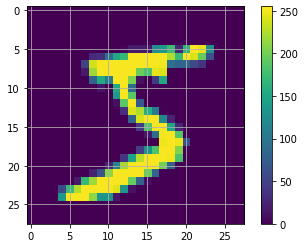

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

In [20]:
list(filter(lambda x: x !=0, train_images[0].reshape(-1)))[:10]

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [21]:
print(f'train_images.dtype : {train_images.dtype}')
print(f'train_labels.dtype : {train_labels.dtype}')
print(f'test_images.dtype : {test_images.dtype}')
print(f'test_labels.dtype : {test_labels.dtype}')

train_images.dtype : uint8
train_labels.dtype : uint8
test_images.dtype : uint8
test_labels.dtype : uint8


In [22]:
print(f'0이 아닌 수를 출력 10개까지 : {list(filter(lambda x : x!=0, train_images[0].reshape(-1)))[:10]}')
print(f'test_images의 shape : {test_images.shape}')
print(f'test_images의 dtype : {test_images.dtype}')

0이 아닌 수를 출력 10개까지 : [3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
test_images의 shape : (10000, 28, 28)
test_images의 dtype : uint8


In [23]:
print(f'train_images의 max 값 : {max(train_images[0].reshape(-1))}')
print(f'train_images의 min 값 : {min(train_images[0].reshape(-1))}')

print(f'train_labels의 max 값 : {max(train_labels.reshape(-1))}')
print(f'train_labels의 min 값 : {min(train_labels.reshape(-1))}')

print(f'test_images의 max 값 : {max(test_images[0].reshape(-1))}')
print(f'test_images의 min 값 : {min(test_images[0].reshape(-1))}')

print(f'train_labels의 max 값 : {max(test_labels.reshape(-1))}')
print(f'train_labels의 min 값 : {min(test_labels.reshape(-1))}')

train_images의 max 값 : 255
train_images의 min 값 : 0
train_labels의 max 값 : 9
train_labels의 min 값 : 0
test_images의 max 값 : 255
test_images의 min 값 : 0
train_labels의 max 값 : 9
train_labels의 min 값 : 0


In [24]:
print(f'전 train_dtype : {train_images.dtype}')
print(f'전 test_dtype : {test_images.dtype}')

# astype dtype을 바꾸어줌
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

print(f'후 train_dtype : {train_images.dtype}')
print(f'후 test_dtype : {test_images.dtype}')

전 train_dtype : uint8
전 test_dtype : uint8
후 train_dtype : float64
후 test_dtype : float64


In [25]:
train_images = train_images / 255
test_images = test_images / 255

In [29]:
print(f'normalize 후 0이 아닌 값 : {list(filter(lambda x: x!=0,train_images[0].reshape(-1)))[:10]}')
print(f'normalize 후 max 값 : {max(train_images[0].reshape(-1))}')
print(f'normalize 후 min 값 : {min(train_images[0].reshape(-1))}')
print(f'normalize 후 shape 값 : {train_images.shape}')
print(f'normalize 후 dtype 값 : {train_images.dtype}')

normalize 후 0이 아닌 값 : [0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
normalize 후 max 값 : 1.0
normalize 후 min 값 : 0.0
normalize 후 shape 값 : (60000, 28, 28)
normalize 후 dtype 값 : float64


In [30]:
train_images[:5].shape

(5, 28, 28)

In [31]:
np.hstack(train_images[:5]).shape

(28, 140)

In [32]:
train_images[:5].transpose((1,0,2)).reshape(28,-1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

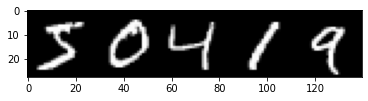

In [34]:
plt.figure()
plt.imshow(np.hstack(train_images[:5]),cmap='gray')
plt.show()

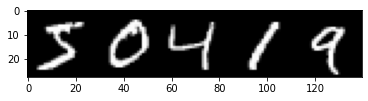

In [35]:
plt.figure()
plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1),cmap='gray')
plt.show()

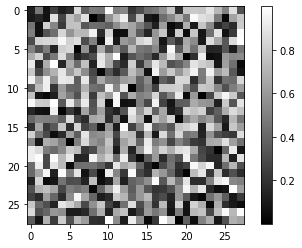

In [37]:
plt.figure()
plt.imshow(np.random.random((28,28)),cmap='gray')
plt.colorbar()
plt.show()

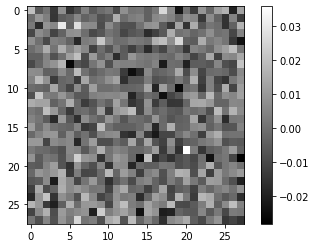

In [41]:
plt.figure()
plt.imshow(np.random.normal(0.0,0.01,(28,28)),cmap='gray') # 평균 0 표준편차 0.01
plt.colorbar()
plt.show()

In [42]:
noisy_images = train_images[5] + np.random.normal(0.5,0.01,(28,28))

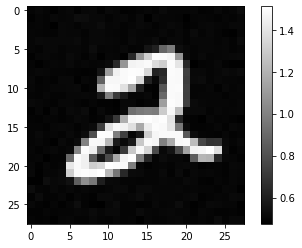

In [44]:
plt.imshow(noisy_images, cmap='gray')
plt.colorbar()
plt.show()

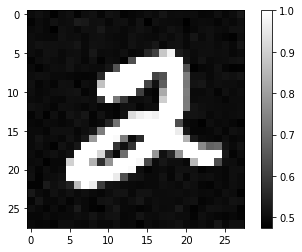

In [45]:
noisy_images[noisy_images > 1.0] = 1.0
plt.imshow(noisy_images, cmap='gray')
plt.colorbar()
plt.show()

In [46]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0

test_noisy_images = test_images + np.random.normal(0.5,0.1,test_images.shape)
test_noisy_images[test_noisy_images>1.0] = 1.0

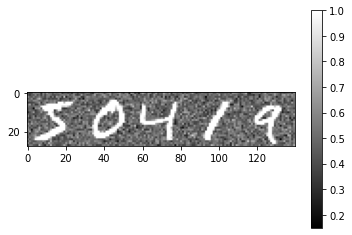

labels : [5 0 4 1 9]


In [48]:
plt.imshow(train_noisy_images[:5].transpose( (1,0,2) ).reshape(28,-1),cmap='gray')
plt.colorbar()
plt.show()
print(f'labels : {train_labels[:5]}')

In [49]:
from tensorflow.keras.utils import to_categorical
print(train_labels.shape, test_labels.shape)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [51]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

inputs = Input(shape=(28,28))
x1 = SimpleRNN(64,activation = 'tanh')(inputs)
x2 = Dense(10, activation = 'softmax')(x1)

model = Model(inputs,x2)

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [55]:
hist = model.fit(train_noisy_images, train_labels, validation_data = (test_noisy_images, test_labels),epochs = 15, verbose = 2)

Epoch 1/15
1875/1875 - 24s - loss: 0.7381 - accuracy: 0.7551 - val_loss: 0.4241 - val_accuracy: 0.8699 - 24s/epoch - 13ms/step
Epoch 2/15
1875/1875 - 20s - loss: 0.3839 - accuracy: 0.8834 - val_loss: 0.3035 - val_accuracy: 0.9105 - 20s/epoch - 11ms/step
Epoch 3/15
1875/1875 - 19s - loss: 0.3096 - accuracy: 0.9082 - val_loss: 0.3018 - val_accuracy: 0.9064 - 19s/epoch - 10ms/step
Epoch 4/15
1875/1875 - 23s - loss: 0.2757 - accuracy: 0.9176 - val_loss: 0.2651 - val_accuracy: 0.9245 - 23s/epoch - 12ms/step
Epoch 5/15
1875/1875 - 22s - loss: 0.2522 - accuracy: 0.9255 - val_loss: 0.2563 - val_accuracy: 0.9249 - 22s/epoch - 12ms/step
Epoch 6/15
1875/1875 - 20s - loss: 0.2416 - accuracy: 0.9280 - val_loss: 0.2285 - val_accuracy: 0.9333 - 20s/epoch - 10ms/step
Epoch 7/15
1875/1875 - 21s - loss: 0.2292 - accuracy: 0.9331 - val_loss: 0.2290 - val_accuracy: 0.9349 - 21s/epoch - 11ms/step
Epoch 8/15
1875/1875 - 20s - loss: 0.2150 - accuracy: 0.9371 - val_loss: 0.2071 - val_accuracy: 0.9417 - 20s/ep

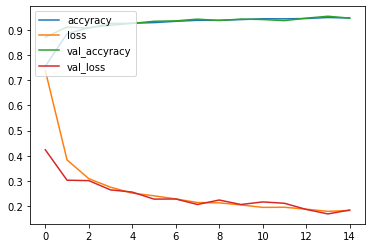

In [56]:
plt.plot(hist.history['accuracy'],label = 'accyracy')
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_accuracy'],label = 'val_accyracy')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend(loc='upper left')
plt.show()

In [57]:
res = model.predict(test_noisy_images[:1])
res.shape

(1, 10)

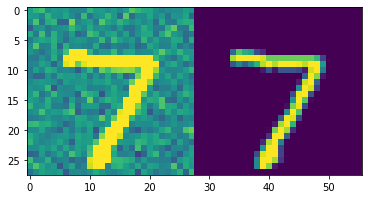

In [58]:
plt.imshow(np.concatenate([test_noisy_images[0],test_images[0]],axis=1))
plt.show()

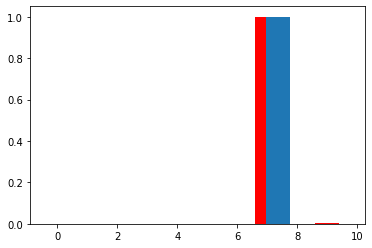

In [59]:
plt.bar(range(0,10),res[0],color = 'red')
plt.bar(np.array(range(10))+0.35, test_labels[0])
plt.show()